### 1. Load Libraries and Data

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandasql as ps
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime
import pandasql as ps

In [2]:
os.chdir("/Users/tonychu/SynologyDrive/Drive Workspace/Dissertation/datasets/")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Please change the directory to where you store the raw datasets
print("List of available files: ")
for dirname, _, filenames in os.walk('nba_stats'): 
    for filename in filenames:
        print("- ", filename)

List of available files: 
-  Team Stats Per 100 Poss.csv
-  End of Season Teams (Voting).csv
-  Team Totals.csv
-  Player Per Game.csv
-  Advanced.csv
-  .DS_Store
-  End of Season Teams.csv
-  Opponent Stats Per 100 Poss.csv
-  Player Career Info.csv
-  Player Totals.csv
-  Player Play By Play.csv
-  Player Season Info.csv
-  All-Star Selections.csv
-  Team Abbrev.csv
-  Per 36 Minutes.csv
-  Opponent Stats Per Game.csv
-  Team Summaries.csv
-  Player Shooting.csv
-  Team Stats Per Game.csv
-  Per 100 Poss.csv
-  Opponent Totals.csv
-  Player Award Shares.csv


In [5]:
team_totals_raw = pd.read_csv("nba_stats/Team Totals.csv")
team_totals_raw.head(10)

,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2023,NBA,Atlanta Hawks,ATL,False,7.0,1680.0,308.0,640.0,0.481,72.0,200.0,0.360,236.0,440.0,0.536,124.0,151.0,0.821,68.0,231.0,299.0,179.0,47.0,42.0,88.0,157.0,812.0
1,2023,NBA,Boston Celtics,BOS,False,6.0,1465.0,244.0,509.0,0.479,97.0,243.0,0.399,147.0,266.0,0.553,115.0,135.0,0.852,48.0,194.0,242.0,148.0,35.0,34.0,83.0,134.0,700.0
2,2023,NBA,Brooklyn Nets,BRK,False,7.0,1705.0,286.0,597.0,0.479,76.0,228.0,0.333,210.0,369.0,0.569,149.0,185.0,0.805,63.0,210.0,273.0,173.0,51.0,60.0,98.0,164.0,797.0
3,2023,NBA,Chicago Bulls,CHI,False,7.0,1680.0,276.0,609.0,0.453,73.0,201.0,0.363,203.0,408.0,0.498,164.0,194.0,0.845,79.0,226.0,305.0,166.0,66.0,33.0,101.0,142.0,789.0
4,2023,NBA,Charlotte Hornets,CHO,False,7.0,1730.0,307.0,652.0,0.471,85.0,218.0,0.390,222.0,434.0,0.512,120.0,166.0,0.723,79.0,243.0,322.0,199.0,48.0,37.0,104.0,150.0,819.0
5,2023,NBA,Cleveland Cavaliers,CLE,False,6.0,1490.0,249.0,521.0,0.478,88.0,206.0,0.427,161.0,315.0,0.511,120.0,149.0,0.805,61.0,201.0,262.0,152.0,33.0,25.0,91.0,130.0,706.0
6,2023,NBA,Dallas Mavericks,DAL,False,6.0,1490.0,241.0,506.0,0.476,82.0,228.0,0.360,159.0,278.0,0.572,143.0,191.0,0.749,55.0,197.0,252.0,115.0,47.0,26.0,77.0,137.0,707.0
7,2023,NBA,Denver Nuggets,DEN,False,7.0,1680.0,295.0,618.0,0.477,93.0,236.0,0.394,202.0,382.0,0.529,116.0,161.0,0.720,80.0,240.0,320.0,188.0,46.0,29.0,99.0,144.0,799.0
8,2023,NBA,Detroit Pistons,DET,False,8.0,1920.0,312.0,719.0,0.434,92.0,270.0,0.341,220.0,449.0,0.490,178.0,230.0,0.774,102.0,254.0,356.0,179.0,47.0,26.0,108.0,184.0,894.0
9,2023,NBA,Golden State Warriors,GSW,False,7.0,1705.0,302.0,649.0,0.465,98.0,286.0,0.343,204.0,363.0,0.562,129.0,159.0,0.811,73.0,228.0,301.0,201.0,55.0,31.0,112.0,163.0,831.0


### Examine league wide three point attempts vs three point made throughout the seasons after the implementation of three point lines after 1980 ###

In [6]:
league_average = team_totals_raw[(team_totals_raw.season > 1979) & (team_totals_raw.season < 2023) & (team_totals_raw.team == "League Average")]

In [7]:
three_point_league_average = league_average[["season","g","x3p","x3pa","x3p_percent"]]
three_point_league_average["avg_x3p"] = three_point_league_average["x3p"]/three_point_league_average["g"]
three_point_league_average["avg_x3pa"] = three_point_league_average["x3pa"]/three_point_league_average["g"]

<ipython-input-7-53dfc2db7277>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_point_league_average["avg_x3p"] = three_point_league_average["x3p"]/three_point_league_average["g"]
<ipython-input-7-53dfc2db7277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_point_league_average["avg_x3pa"] = three_point_league_average["x3pa"]/three_point_league_average["g"]


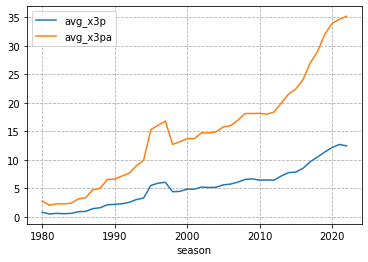

<Figure size 1440x1440 with 0 Axes>

In [8]:
three_point_league_average.plot(x = 'season', y = ['avg_x3p','avg_x3pa'])
plt.grid(True, linestyle='--')
plt.figure(figsize=(20,20))
plt.show()

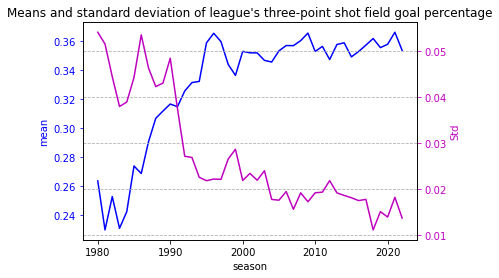

<Figure size 1440x1440 with 0 Axes>

In [9]:
mean_std_x3p_percent = team_totals_raw[(team_totals_raw.season > 1979) & (team_totals_raw.season < 2023)].groupby('season').agg({'x3p_percent':['mean', 'std']}).reset_index()
# mean_std_x3p_percent['x3p_percent']
mean_std_x3p_percent = pd.DataFrame(mean_std_x3p_percent['season']).join(mean_std_x3p_percent['x3p_percent'])
#mean_std_x3p_percent.plot(x = 'season', y = ['mean','std'])

fig, ax1 = plt.subplots()
ax1.plot(mean_std_x3p_percent["season"], mean_std_x3p_percent['mean'], 'b-')
ax1.set_xlabel('season')
ax1.set_ylabel('mean', color='b')
ax1.tick_params('y', colors='b')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(mean_std_x3p_percent["season"], mean_std_x3p_percent['std'], 'm-')
ax2.set_ylabel('Std', color='m')
ax2.tick_params('y', colors='m')


plt.title("Means and standard deviation of league's three-point shot field goal percentage")

plt.grid(True, linestyle='--')
plt.figure(figsize=(20,20))
plt.show()


In [11]:
player_totals_raw = pd.read_csv("nba_stats/Player Totals.csv")
player_totals_raw.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [12]:
player_totals_raw = player_totals_raw[(player_totals_raw.season > 1979) & (player_totals_raw.season < 2023)]
player_totals_elite = player_totals_raw[(player_totals_raw["x3pa"] >= 50) & (player_totals_raw["x3p_percent"] >= 0.36)]

In [13]:
total_players_per_year = player_totals_raw.groupby(['season']).size().reset_index(name='numbers of players')
elite_shooters_per_year = player_totals_elite.groupby(['season']).size().reset_index(name='numbers of elite shooters')
total_vs_elite = pd.merge(total_players_per_year, elite_shooters_per_year, on='season')

In [14]:
total_vs_elite['ratio']=total_vs_elite['numbers of elite shooters']/total_vs_elite['numbers of players']

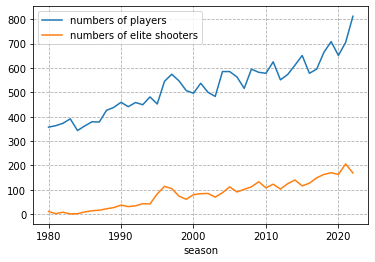

In [15]:
total_vs_elite.plot(x = 'season', y = ['numbers of players','numbers of elite shooters'])
plt.grid(True, linestyle='--')
plt.show()

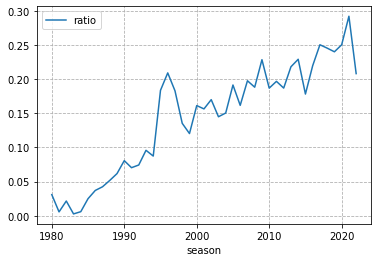

In [16]:
total_vs_elite.plot(x = 'season', y = 'ratio')
plt.grid(True, linestyle='--')
plt.show()


### Conclusion 1 ###
- average three-point attempts and three-point shots made continue to rise
- average attempt is about 7 times more than 30 years ago
- Average three-point percentages stabilized and plateaud around 2000s at around 34 - 36 percent
- Number of players and the number of players that shot well from three point lines continue to increase (expansion of the league)
- The percentage of players that can shoot well from three point lines continue to increase. Over 1/4 of the players in the league attempt at least 50 shots and shoot at least 36 percent

### Shot Distances ###

In [17]:
shot_locations = pd.read_csv("shot_position/NBA Shot Locations 1997 - 2020.csv")

In [18]:
shot_locations['season'] = pd.to_datetime(shot_locations["Game Date"],format='%Y%m%d').dt.year

In [19]:
shot_locations.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,season
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season,1998
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season,1998
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season,1998
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season,1998
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season,1998


In [20]:
shot_locations['Shot Type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [21]:
# q1 = """SELECT * 
#         FROM shot_locations
#         """
# ps.sqldf(q1, locals())

shot_distance = shot_locations.groupby(["season","Shot Distance"])["Shot Made Flag"].apply(lambda x: (x == 1).sum()).reset_index(name='made')

shot_distance["total"] = shot_locations.groupby(["season","Shot Distance"])["Shot Made Flag"].apply(lambda x: (x >=0).sum()).reset_index(name='total')["total"]

In [22]:
shot_distance["percentage"] = shot_distance["made"] / shot_distance["total"]

In [32]:
shot_distance.head(20)

,season,Shot Distance,made,total,percentage
0,1997,0,11570,18591,0.622344
1,1997,1,849,1415,0.600000
2,1997,2,555,1257,0.441527
3,1997,3,463,1268,0.365142
4,1997,4,609,1594,0.382058
5,1997,5,623,1767,0.352575
6,1997,6,552,1619,0.340951
7,1997,7,618,1631,0.378909
8,1997,8,567,1502,0.377497
9,1997,9,478,1312,0.364329


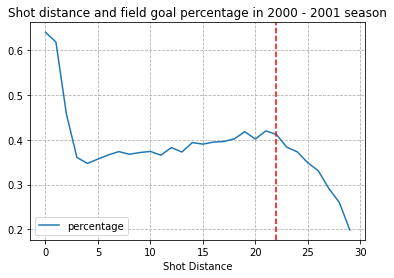

In [24]:
shot_distance[(shot_distance["season"] == 2000) & (shot_distance["Shot Distance"] <30)].plot(x = 'Shot Distance', y = 'percentage')
plt.axvline(x=22, color='r', linestyle='--')
plt.title("Shot distance and field goal percentage in 2000 - 2001 season")
plt.grid(True, linestyle='--')
plt.show()

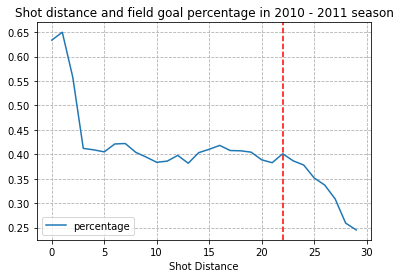

In [25]:
shot_distance[(shot_distance["season"] == 2010) & (shot_distance["Shot Distance"] <30)].plot(x = 'Shot Distance', y = 'percentage')
plt.axvline(x=22, color='r', linestyle='--')
plt.title("Shot distance and field goal percentage in 2010 - 2011 season")
plt.grid(True, linestyle='--')
plt.show()

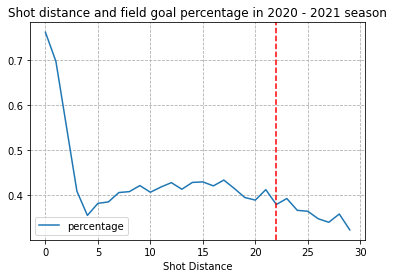

In [26]:
shot_distance[(shot_distance["season"] == 2020) & (shot_distance["Shot Distance"] <30)].plot(x = 'Shot Distance', y = 'percentage')
plt.axvline(x=22, color='r', linestyle='--')
plt.title("Shot distance and field goal percentage in 2020 - 2021 season")
plt.grid(True, linestyle='--')
plt.show()

In [27]:
shot_worth = shot_locations.groupby(["season","Shot Type", "Shot Distance"])["Shot Made Flag"].apply(lambda x: (x == 1).sum()).reset_index(name='made')
shot_worth["total"] = shot_locations.groupby(["season","Shot Type", "Shot Distance"])["Shot Made Flag"].apply(lambda x: (x >=0).sum()).reset_index(name='total')["total"]

In [28]:
shot_worth.loc[shot_worth['Shot Type'] == "2PT Field Goal", "Shot Type"] = 2
shot_worth.loc[shot_worth['Shot Type'] == "3PT Field Goal", "Shot Type"] = 3
shot_worth["point per shot"] = (shot_worth["Shot Type"] * shot_worth["made"]) / shot_worth["total"]

In [29]:
shot_worth[shot_worth["point per shot"] > 2]

,season,Shot Type,Shot Distance,made,total,point per shot
26,1997,3,19,1,1,3.0
27,1997,3,21,1,1,3.0
114,1998,3,20,1,1,3.0
222,1999,3,11,1,1,3.0
224,1999,3,21,2,2,3.0
323,2000,3,17,1,1,3.0
324,2000,3,20,1,1,3.0
417,2001,3,17,1,1,3.0
482,2001,3,88,1,1,3.0
510,2002,3,8,1,1,3.0


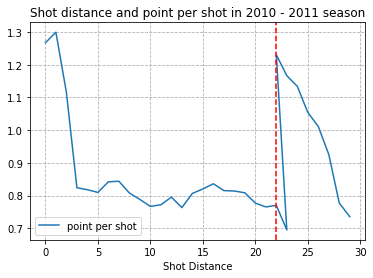

In [30]:
shot_worth[(shot_worth["season"] == 2010) & (shot_worth["Shot Distance"] <30)].plot(x = 'Shot Distance', y = 'point per shot')
plt.axvline(x=22, color='r', linestyle='--')
plt.title("Shot distance and point per shot in 2010 - 2011 season")
plt.grid(True, linestyle='--')
plt.show()

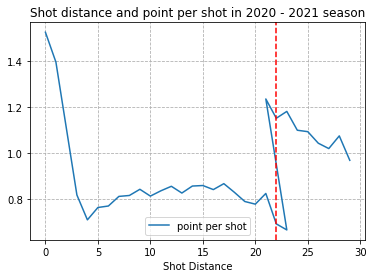

In [31]:
shot_worth[(shot_worth["season"] == 2020) & (shot_worth["Shot Distance"] <30)].plot(x = 'Shot Distance', y = 'point per shot')
plt.axvline(x=22, color='r', linestyle='--')
plt.title("Shot distance and point per shot in 2020 - 2021 season")
plt.grid(True, linestyle='--')
plt.show()

### Conclusion 2 ###
- the three-point field goal percentages are not too far off from shooting within the three point line (and 3 feet away from the basket), making three-point shots better alternatives since the point per shot from the three-point line worths more points